# Do we need more bikes? Project in ML


Capital Bikeshare is a 24-hour public bicycle-sharing system that serves Washington, D.C., and which offers transportation for thousands of people throughout the city. The problem that arises is that there are certain occasions when, due to various circumstances, there are not as many bikes available as there are demands. In the long term, this situation will result in more people taking the car instead of the bicycle, increasing CO2 emissions in the city. To tackle this situation, the District Department of Transportation in the city wants to know if at certain hours an increase in the number of bikes available will be necessary.
The goal of the project is to predict whether an increase in the number of bikes is necessary or not based on various temporal and meteorological data. You are expected to use all the knowledge that you have acquired in the course about classification algorithms, to come up with one model that you think is suited for this problem and which you decide to put ‘in production’. This model will then be tested against a test set made available after peer review.

Method to be implemented
(i) Logistic regression
(ii) Discriminant analysis: LDA, QDA
(iii) K-nearest neighbor
(iv) Tree-based methods: classification trees, random forests, bagging
(v) Boosting


In this project we will present a logistic regressor, LDA,K-nearest neighbor, random forests and a deep neural network


Authors:

Anton Blaho Mildton, Nir Teyar, Axel Östfeldt, Jennifer Underdal



In [211]:
#Install libaries
#Funkar i python 3.9

#!pip install pydot
#!pip install tensorflow
#!pip install prettytable
#!pip install mlxtend
#!pip install seaborn


In [212]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.random
from keras.callbacks import TensorBoard
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pydot

from prettytable import PrettyTable
from mlxtend.plotting import plot_decision_regions
import warnings
import seaborn as sns




In [213]:
# Ignore all warnings
warnings.filterwarnings("ignore")

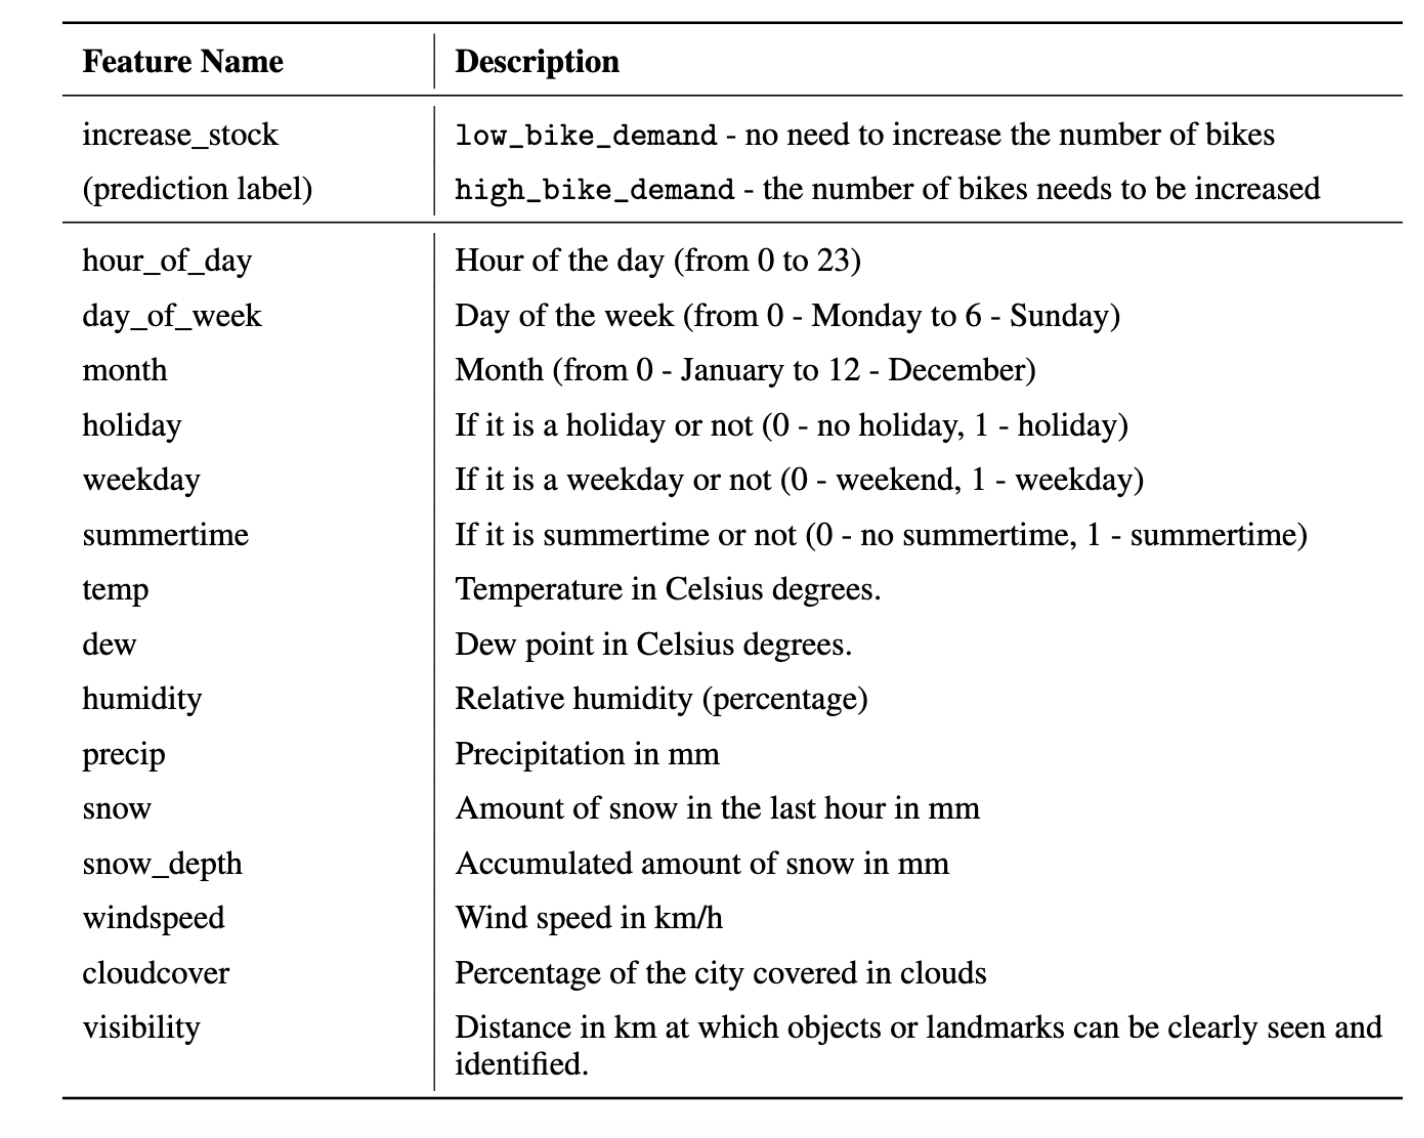

In [214]:
image_filename = 'Datafeatures.png'

# Display the image
display(Image(filename=image_filename))

# Data preprocessing

In [215]:
df = pd.read_csv('training_data.csv')
df

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [216]:
column_names = df.columns
column_names

Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

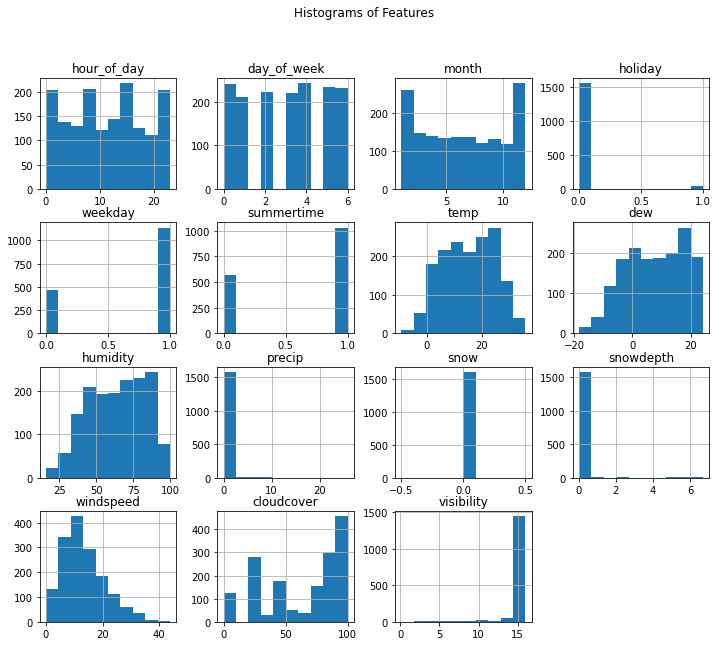

In [217]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Features")
plt.show()


We can see that snop is constant for all datapoints (0), which will therefore be dropped due to that there is nothing for a ML modell to learn from a constant value

In [218]:
#drop snowdepth coloumn
dftrain = df.drop('snow', axis=1)
dftrain

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,high_bike_demand


Feature building to categorize bad and good weather condition. This is in general good to do, due to that the ML model get more data

In [219]:
# Good weather =1 bad weather =0
featurebuild = []

for i in range(1600):
    if dftrain['temp'][i] > 10 and dftrain['windspeed'][i] < 10 and dftrain['cloudcover'][i] < 50:
        featurebuild.append(1)
    else:
        featurebuild.append(0)


count_of_ones = featurebuild.count(1)
print(count_of_ones)

162


In [220]:
position = 1
dftrain.insert(position, 'featurebuild', featurebuild)

In [221]:
# Create the target vector
# 0 - low_bike_demand
# 1 - high_bike_demand

target_vect = dftrain.loc[:,'increase_stock'].to_numpy()


# One hot encoder for the data
enc = OneHotEncoder()
target_names = ['low_bike_demand','high_bike_demand']
target = enc.fit_transform(target_vect[:, np.newaxis]).toarray()

In [222]:
Target=pd.DataFrame(target)
Target #First coloumn is the correct and used one

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1595,0.0,1.0
1596,0.0,1.0
1597,0.0,1.0
1598,1.0,0.0


In [300]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    dftrain.iloc[:,0:df.shape[1]-1], Target.iloc[:,0], test_size=0.1,random_state=2) #Test

In [301]:
df.iloc[:,0:df.shape[1]-1]

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0


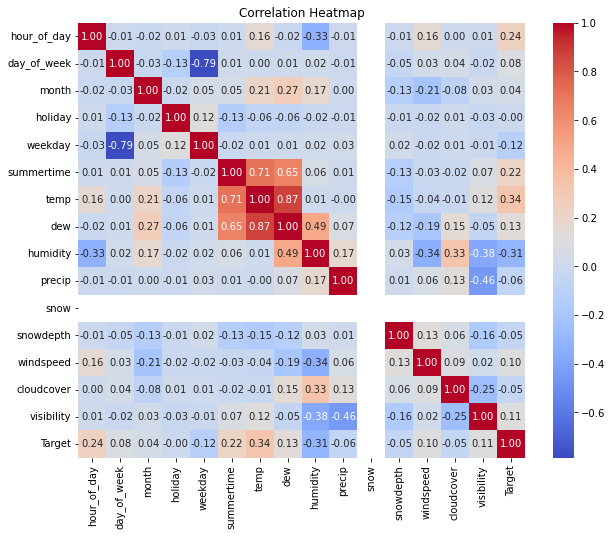

In [302]:
#Concating our target 

df_concatenated = pd.concat([df, Target[0]], axis=1)
df_concatenated.rename(columns={Target[0].name: 'Target'}, inplace=True)  # Rename the column to 'Target'

df_concatenated = df_concatenated.drop(columns=['increase_stock'])
#Calculate Correlation
correlation_matrix = df_concatenated.corr()

# Create Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [303]:
df_concatenated

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,Target
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,0.0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,0.0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,0.0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,0.0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,0.0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,0.0
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,0.0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,1.0


# Gaussian Naive Bayes

In [304]:
# Build a Gaussian Classifier
modelNaive = GaussianNB()

# Model training
modelNaive.fit(X_train, Y_train)

# Predict Output
predicted = modelNaive.predict(X_test)


In [305]:
y_pred = modelNaive.predict(X_test)
accurayNaive = accuracy_score(y_pred, Y_test)
f1_scoreNaive=f1_score(Y_test, y_pred, average="binary")
print("Accuracy:", accurayNaive)
print("F1score:", f1_scoreNaive)


Accuracy: 0.44375
F1score: 0.44720496894409945


In [306]:
print("Classification Report:")
print(classification_report(y_pred, Y_test))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.28      0.97      0.44        36
         1.0       0.97      0.29      0.45       124

    accuracy                           0.44       160
   macro avg       0.63      0.63      0.44       160
weighted avg       0.82      0.44      0.45       160



# KNN (K nearest neighbours)





In [307]:
def average_list(lst):
    sum = sum(lst)
    len = len(lst)
    return sum/len

In [308]:
#Algorithm parameters
K = 50
test_cases = 10


In [309]:
X = df.iloc[:,0:df.shape[1]-1]
Y = Target.iloc[:,0] # Extract the target column

In [310]:
X = np.array(X)
Y = np.array(Y)

In random state  1 the best K value was  1  at a  0.8  accuracy score.
In random state  2 the best K value was  28  at a  0.875  accuracy score.
In random state  3 the best K value was  5  at a  0.8125  accuracy score.
In random state  4 the best K value was  5  at a  0.9  accuracy score.
In random state  5 the best K value was  10  at a  0.86875  accuracy score.
In random state  6 the best K value was  28  at a  0.89375  accuracy score.
In random state  7 the best K value was  4  at a  0.85  accuracy score.
In random state  8 the best K value was  5  at a  0.84375  accuracy score.
In random state  9 the best K value was  8  at a  0.875  accuracy score.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In random state  10 the best K value was  10  at a  0.88125  accuracy score.


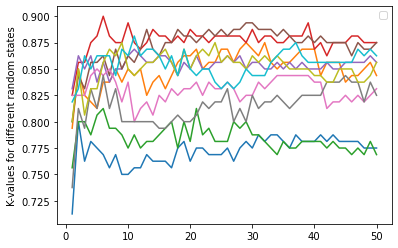

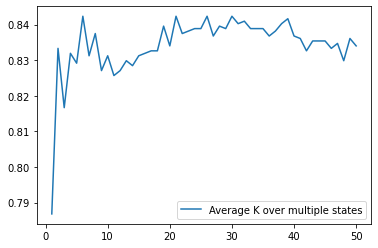

In [311]:
all_k_values = []
plt.figure()
plt.ylabel('K-values for different random states')

for states in range(test_cases):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=states)
    k_list = []

    for k in range(1,K+1):
        #Implement algorithm
        KNN = KNeighborsClassifier(n_neighbors=k) #Initiate the algorithm method
        KNN.fit(Xtrain, Ytrain) #Fit the algorithm to our training set
        Ypred = KNN.predict(Xtest) # Based on our KNN we now make predctions for our test set
        #Evaluate results 
        k_list.append(accuracy_score(Ytest, Ypred))
        #print('K Value: ', k ,'\nAccuracy Score: ', accuracy_score(Ytest, Ypred), '\nClassifications Report:\n', classification_report(Ytest, Ypred), '\nConfusion matrix: \n', confusion_matrix(Ytest,Ypred), '\n\n\n')

    plt.plot(range(1,K+1), k_list)

    #Find maximum k value 
    max_k = max(k_list)
    #Find the index of the maximum value
    max_k_index = k_list.index(max_k)
    print('In random state ', states+ 1, 'the best K value was ', max_k_index, ' at a ', max_k, ' accuracy score.')
    all_k_values.append(k_list)
plt.legend()
mean_k = []

for i in range(K):
    temp = 0
    for j in range(states):
        temp += all_k_values[j][i]
    mean_k.append(temp/states)
    
plt.figure()
plt.plot(range(1,K+1), mean_k, label='Average K over multiple states')
plt.legend()

In [312]:
#Correct prediction by the modell as a procentage
accuracyKNN = accuracy_score(Ytest, Ypred)
f1_scoreKNN=f1_score(Ytest, Ypred, average="binary")

print(f"Accuracy: {accuracyKNN}")
print("F1score:", f1_scoreKNN)


Accuracy: 0.8625
F1score: 0.5599999999999999


In [313]:
print("Classification Report:")
print(classification_report(Ytest, Ypred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       125
         1.0       0.93      0.40      0.56        35

    accuracy                           0.86       160
   macro avg       0.89      0.70      0.74       160
weighted avg       0.87      0.86      0.84       160



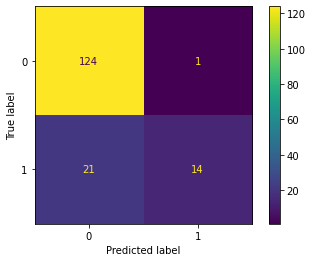

In [314]:
conf_mat = confusion_matrix(Ytest, Ypred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

## Random forest (Classification tree)




In [315]:

"""
Input parameters for RandomForestClassifier

n_estimators: The number of trees in the forest.

criterion: The function used to measure the quality of a split. It can be either 'gini' for Gini impurity or 'entropy' for information gain.

max_depth: The maximum depth of the tree. If None, the nodes are expanded until all leaves are pure or until they contain less than the minimum samples split.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

max_features: The number of features to consider when looking for the best split. It can be an int, float, 'auto', 'sqrt', 'log2', or None.

max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold; otherwise, it is a leaf.

bootstrap: Whether bootstrap samples are used when building trees.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

n_jobs: The number of jobs to run in parallel for both fit and predict. -1 means using all processors.

random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.


"""
Froet = RandomForestClassifier()

Parameters = {
    #'n_estimators': [200, 400, 600, 800, 1000],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    #'min_samples_split' : [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'criterion' :['gini', 'entropy'],
    'n_estimators': [600],
    'max_features': ['auto'],
    'max_depth' : [8],
    'min_samples_split' : [2],
    'min_samples_leaf': [4],
    'criterion' :['entropy'],
    'n_jobs' : [-1]
}


Parameters = {
    'n_estimators': [600],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [8],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'criterion': ['entropy'],
    'n_jobs': [-1]
}


Skogen = GridSearchCV(Froet, Parameters, scoring='accuracy', refit=True)
Skogen.fit(X_train, Y_train)


model_prediction = Skogen.predict(X_test)

In [316]:
best_params = Skogen.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600, 'n_jobs': -1}


In [318]:
#Correct prediction by the modell as a procentage
accuracyRandomF = accuracy_score(Y_test, model_prediction)
f1_scoreRandomF=f1_score(Y_test, model_prediction, average="binary")

print(f"Accuracy: {accuracyRandomF}")
print("F1score:", f1_scoreRandomF)


Accuracy: 0.875
F1score: 0.7142857142857142


In [319]:
print("Classification Report:")
print(classification_report(Y_test, model_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       123
         1.0       0.76      0.68      0.71        37

    accuracy                           0.88       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.87      0.88      0.87       160



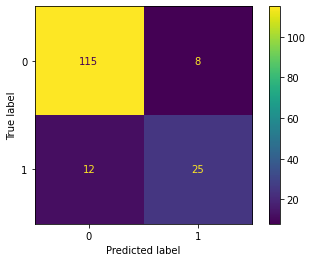

In [320]:
conf_mat = confusion_matrix(Y_test, model_prediction)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [243]:
n_estimators_value = best_params['n_estimators']
max_features_value = best_params['max_features']
max_depth_value = best_params['max_depth']
min_samples_split_value = best_params['min_samples_split']
min_samples_leaf_value = best_params['min_samples_leaf']
criterion_value = best_params['criterion']

Ek_froet = RandomForestClassifier(
    n_estimators=n_estimators_value,
    max_features=max_features_value,
    max_depth=max_depth_value,
    min_samples_split=min_samples_split_value,
    min_samples_leaf=min_samples_leaf_value,
    criterion=criterion_value
)



Ek_froet.fit(X_train, Y_train)

Eken = Ek_froet.estimators_[1]

#export_graphviz(Eken, out_file = 'ett_trad_main.dot', feature_names = list(column_names), rounded = True, precision = 3)

#(graph, ) = pydot.graph_from_dot_file('ett_trad_main.dot')

#graph.write_png('ett_trad_main.png')

## Logistic regression

In [244]:
Parameters={
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1, 10, 25, 50, 100, 1000],
}

# Specify the logistic regression model
logistic_model = LogisticRegression()

# Initialize the grid search with logistic regression and parameter grid
logicgrid = GridSearchCV(logistic_model, Parameters, scoring='accuracy', refit=True)

# Train the model on the training data
logicgrid.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params = logicgrid.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions
y_pred = logicgrid.predict(X_test)



Best Parameters: {'max_iter': 25, 'solver': 'newton-cg'}


In [245]:
#Correct prediction by the modell as a procentage
accuracyLOG = accuracy_score(Y_test, y_pred)
f1_scoreLOG=f1_score(Y_test, y_pred, average="binary")

print(f"Accuracy: {accuracyLOG}")
print("F1score:", f1_scoreLOG)

Accuracy: 0.8125
F1score: 0.44444444444444453


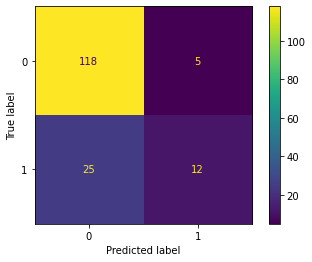

In [246]:
conf_mat = confusion_matrix(Y_test, y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [247]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       123
         1.0       0.71      0.32      0.44        37

    accuracy                           0.81       160
   macro avg       0.77      0.64      0.67       160
weighted avg       0.80      0.81      0.78       160



# Discriminant analysis


In [248]:
modeldisc = LinearDiscriminantAnalysis()


In [249]:
Parameters={
    'solver': ['svd', 'lsqr', 'eigen'],
    'priors': [[0.4, 0.6], [0.6, 0.4], [0.5, 0.5]],
    'n_components': [1,5,10,15]  # Depending on the number of features in your dataset
}


In [250]:
clf = GridSearchCV(modeldisc, Parameters, scoring='accuracy', refit=True)


In [251]:
clf.fit(X_train, Y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [1, 5, 10, 15],
                         'priors': [[0.4, 0.6], [0.6, 0.4], [0.5, 0.5]],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [252]:
best_params =clf.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_components': 1, 'priors': [0.6, 0.4], 'solver': 'svd'}


In [253]:
# fit model
clf.fit(X_train, Y_train)
# make a prediction
yhat = clf.predict(X_test)


In [254]:
# Evaluate the model
accuracyDisc = accuracy_score(Y_test, yhat)
f1_scoreDisc=f1_score(Y_test, yhat, average='binary')

conf_matrix = confusion_matrix(Y_test, yhat)
classification_rep = classification_report(Y_test, yhat)
print('Accuracy:',accuracyDisc)
print("F1score:", f1_scoreDisc)


Accuracy: 0.8125
F1score: 0.6052631578947368


In [255]:
print("Classification Report:")
print(classification_report(Y_test, model_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       123
         1.0       0.76      0.68      0.71        37

    accuracy                           0.88       160
   macro avg       0.83      0.81      0.82       160
weighted avg       0.87      0.88      0.87       160



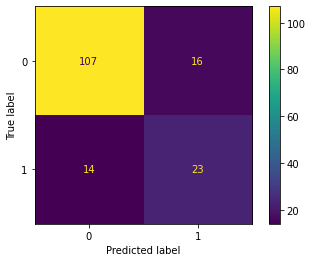

In [256]:
conf_mat = confusion_matrix(Y_test, yhat)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

# Deep learning NN

In [257]:
modeldeep = keras.Sequential([
    layers.InputLayer(input_shape=(15,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [258]:
X_train

,hour_of_day,featurebuild,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility
694,13,0,4,2,0,1,0,9.3,-6.7,31.74,0.000,0.00,9.3,81.3,16.0
990,9,0,1,2,0,1,0,-3.1,-8.4,67.20,0.000,0.20,10.9,24.4,16.0
1268,12,0,5,6,0,0,1,22.8,9.4,42.47,0.000,0.00,34.7,86.7,16.0
417,12,0,4,1,0,1,0,10.5,-1.2,43.97,0.000,0.00,34.6,46.4,16.0
1553,1,0,3,9,0,1,1,18.7,16.7,88.07,0.000,0.00,5.5,88.6,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,9,0,0,2,0,1,0,-3.4,-12.2,50.75,0.000,0.08,13.5,0.0,16.0
1558,8,0,6,12,0,0,0,5.5,3.4,85.85,0.000,0.00,7.4,100.0,16.0
493,13,0,1,11,0,1,1,9.3,6.1,80.66,0.278,0.00,17.4,99.6,14.2
527,0,1,0,9,0,1,1,16.8,10.0,64.20,0.000,0.00,7.3,0.0,16.0


In [259]:
modeldeep.summary() 


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1024      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 32)               

In [260]:
modeldeep.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [336]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)


In [337]:
epoch=150
history_callback = modeldeep.fit(X_train, Y_train,
                                 batch_size=64,
                                 epochs=epoch,
                                 verbose=1,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[early_stopping_callback])

Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.8764 - val_loss: 0.3334 - val_accuracy: 0.9000
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.8910 - val_loss: 0.3505 - val_accuracy: 0.8813
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8861 - val_loss: 0.3523 - val_accuracy: 0.9000
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8792 - val_loss: 0.3630 - val_accuracy: 0.8813
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8903 - val_loss: 0.3437 - val_accuracy: 0.8813
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8993 - val_loss: 0.3429 - val_accuracy: 0.8875
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8924 - val_loss: 0.3519 - val_accuracy: 0.8875
Epoch 8/150
2

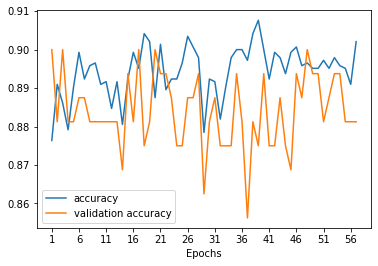

In [343]:
def plot_accuracy(fit, epochs):
    iterations = np.arange(1, epochs+1)
    plt.plot(iterations, fit.history['accuracy'], label='accuracy')
    plt.plot(iterations, fit.history['val_accuracy'],
             label='validation accuracy')
    plt.legend()
    plt.xticks(iterations[::epochs//10])
    plt.xlabel('Epochs')
    plt.show()

num_epochs = 57
57 #change to number of epochs
plot_accuracy(history_callback, num_epochs) #Might change, Depending on number of epochs it runs, previous cell

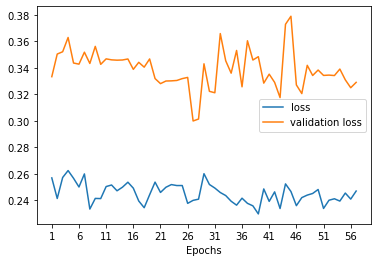

In [344]:
def plot_loss(fit, epochs):
    iterations = np.arange(1, epochs+1)
    plt.plot(iterations, fit.history['loss'], label='loss')
    plt.plot(iterations, fit.history['val_loss'], label='validation loss')
    plt.legend()
    plt.xticks(iterations[::epochs//10])
    plt.xlabel('Epochs')
    plt.show()


plot_loss(history_callback, num_epochs)

In [345]:
pred = modeldeep.predict(X_test)


5/5 [==============================] - 0s 806us/step


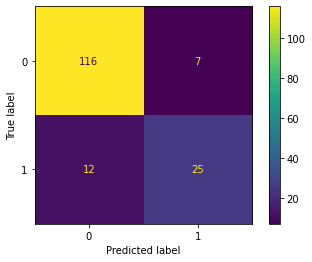

In [346]:
predicted = tensorflow.squeeze(pd.DataFrame(pred))
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(Y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [347]:
# Evaluate the model
accuracydeep = accuracy_score(Y_test, predicted)
f1_scoredeep=f1_score(Y_test, predicted, average='binary')

conf_matrix = confusion_matrix(Y_test, predicted)
classification_rep = classification_report(Y_test, predicted)
print(accuracydeep)
print("F1score:", f1_scoredeep)


0.88125
F1score: 0.7246376811594203


In [348]:
print("Classification Report:")
print(classification_report(Y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       123
         1.0       0.78      0.68      0.72        37

    accuracy                           0.88       160
   macro avg       0.84      0.81      0.82       160
weighted avg       0.88      0.88      0.88       160



# Final result

In [335]:
table = PrettyTable()

table.field_names = ["Model", "Accuracy", "F1 score"]

table.add_row(["Naive Bayes", accurayNaive, f1_scoreNaive])
table.add_row(["KNN",accuracyKNN, f1_scoreKNN])
table.add_row(["Random forest", accuracyRandomF, f1_scoreRandomF])
table.add_row(["Logistic Regression", accuracyLOG, f1_scoreLOG])
table.add_row(["Discriminant analysis", accuracyDisc, f1_scoreDisc])
table.add_row(["Deep learning", accuracydeep, f1_scoredeep])

print(table)

+-----------------------+----------+---------------------+
|         Model         | Accuracy |       F1 score      |
+-----------------------+----------+---------------------+
|      Naive Bayes      | 0.44375  | 0.44720496894409945 |
|          KNN          |  0.8625  |  0.5599999999999999 |
|     Random forest     |  0.875   |  0.7142857142857142 |
|  Logistic Regression  |  0.8125  | 0.44444444444444453 |
| Discriminant analysis |  0.8125  |  0.6052631578947368 |
|     Deep learning     | 0.85625  |  0.676056338028169  |
+-----------------------+----------+---------------------+


# Back to real names

In [271]:
#Result=[] #Back to real names 
#for i in predicted:
#    if i==0:
#        Result.append('low_bike_demand')
#    else:
#        Result.append('high_bike_demand')

## Test data test, for second submission

Main idea here is to use all the training data now (no split of training and testing data so can get as much data
as possible for a better accuracy on the new test data)


First part is to read in and manipulate the test data to the right format and features

In [272]:
test_data=pd.read_csv('test_data.csv')
test_data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
0,14,0,1,0,1,0,-1.7,-1.9,98.86,2.434,0,2.96,33.0,100.0,3.3
1,14,5,3,0,0,0,14.3,2.2,43.93,0.000,0,0.00,16.4,44.6,16.0
2,18,3,1,0,1,0,11.1,7.8,80.07,0.000,0,0.00,7.7,99.2,16.0
3,2,2,1,1,1,0,1.3,-3.2,71.95,0.000,0,0.00,0.0,94.3,16.0
4,15,0,5,0,1,1,16.1,1.6,37.47,0.000,0,0.00,33.7,86.8,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,21,4,9,0,1,1,24.1,20.6,81.09,0.000,0,0.00,9.0,44.6,16.0
396,20,5,1,0,0,0,15.7,14.5,92.63,0.000,0,0.00,1.0,100.0,13.0
397,2,5,7,0,0,1,22.3,12.9,55.48,0.000,0,0.00,6.7,87.5,16.0
398,5,1,4,0,1,1,11.6,6.7,72.01,0.000,0,0.00,6.7,99.6,16.0


In [273]:
#drop snowdepth coloumn
test_data = test_data.drop('snow', axis=1)
test_data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility
0,14,0,1,0,1,0,-1.7,-1.9,98.86,2.434,2.96,33.0,100.0,3.3
1,14,5,3,0,0,0,14.3,2.2,43.93,0.000,0.00,16.4,44.6,16.0
2,18,3,1,0,1,0,11.1,7.8,80.07,0.000,0.00,7.7,99.2,16.0
3,2,2,1,1,1,0,1.3,-3.2,71.95,0.000,0.00,0.0,94.3,16.0
4,15,0,5,0,1,1,16.1,1.6,37.47,0.000,0.00,33.7,86.8,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,21,4,9,0,1,1,24.1,20.6,81.09,0.000,0.00,9.0,44.6,16.0
396,20,5,1,0,0,0,15.7,14.5,92.63,0.000,0.00,1.0,100.0,13.0
397,2,5,7,0,0,1,22.3,12.9,55.48,0.000,0.00,6.7,87.5,16.0
398,5,1,4,0,1,1,11.6,6.7,72.01,0.000,0.00,6.7,99.6,16.0


In [274]:
# Good weather =1 bad weather =0
featurebuild = []

for i in range(400):
    if test_data['temp'][i] > 10 and test_data['windspeed'][i] < 10 and test_data['cloudcover'][i] < 50:
        featurebuild.append(1)
    else:
        featurebuild.append(0)


count_of_ones = featurebuild.count(1)
print(count_of_ones)

33


In [275]:
position = 1
test_data.insert(position, 'featurebuild', featurebuild)

In [276]:
test_data

,hour_of_day,featurebuild,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility
0,14,0,0,1,0,1,0,-1.7,-1.9,98.86,2.434,2.96,33.0,100.0,3.3
1,14,0,5,3,0,0,0,14.3,2.2,43.93,0.000,0.00,16.4,44.6,16.0
2,18,0,3,1,0,1,0,11.1,7.8,80.07,0.000,0.00,7.7,99.2,16.0
3,2,0,2,1,1,1,0,1.3,-3.2,71.95,0.000,0.00,0.0,94.3,16.0
4,15,0,0,5,0,1,1,16.1,1.6,37.47,0.000,0.00,33.7,86.8,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,21,1,4,9,0,1,1,24.1,20.6,81.09,0.000,0.00,9.0,44.6,16.0
396,20,0,5,1,0,0,0,15.7,14.5,92.63,0.000,0.00,1.0,100.0,13.0
397,2,0,5,7,0,0,1,22.3,12.9,55.48,0.000,0.00,6.7,87.5,16.0
398,5,0,1,4,0,1,1,11.6,6.7,72.01,0.000,0.00,6.7,99.6,16.0


In [352]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    dftrain.iloc[:,0:df.shape[1]-1], Target.iloc[:,0], test_size=0.000001,random_state=2) #Test

In [355]:

"""
Input parameters for RandomForestClassifier

n_estimators: The number of trees in the forest.

criterion: The function used to measure the quality of a split. It can be either 'gini' for Gini impurity or 'entropy' for information gain.

max_depth: The maximum depth of the tree. If None, the nodes are expanded until all leaves are pure or until they contain less than the minimum samples split.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

max_features: The number of features to consider when looking for the best split. It can be an int, float, 'auto', 'sqrt', 'log2', or None.

max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold; otherwise, it is a leaf.

bootstrap: Whether bootstrap samples are used when building trees.

oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

n_jobs: The number of jobs to run in parallel for both fit and predict. -1 means using all processors.

random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.


"""
Froet = RandomForestClassifier()

Parameters = {
    #'n_estimators': [200, 400, 600, 800, 1000],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    #'min_samples_split' : [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'criterion' :['gini', 'entropy'],
    'n_estimators': [600],
    'max_features': ['auto'],
    'max_depth' : [8],
    'min_samples_split' : [2],
    'min_samples_leaf': [4],
    'criterion' :['entropy'],
    'n_jobs' : [-1]
}


Parameters = {
    'n_estimators': [600],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [8],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'criterion': ['entropy'],
    'n_jobs': [-1]
}


Skogen = GridSearchCV(Froet, Parameters, scoring='accuracy', refit=True)
Skogen.fit(X_train, Y_train)




GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [600], 'n_jobs': [-1]},
             scoring='accuracy')

In [360]:
testpredrandom = Skogen.predict(test_data)
testpredrandom

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [366]:
epoch=150
history_callback = modeldeep.fit(X_train, Y_train,
                                 batch_size=64,
                                 epochs=epoch,
                                 verbose=1,
                                 #validation_data=(X_test, Y_test), 
                                 callbacks=[early_stopping_callback])

Epoch 1/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9043
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8999
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9087
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.8974
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9018
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9049
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.9068
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9024
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9012
Epoch 10/150
25/25 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9024
Epoch 11/

In [367]:
predtestdeep = modeldeep.predict(test_data) #95 procent in accuracy here


13/13 [==============================] - 0s 579us/step


In [368]:
predicted = tensorflow.squeeze(pd.DataFrame(predtestdeep))
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
predicted

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [380]:
# Element-wise comparison
comparison_result = np.equal(testpredrandom, predicted)

# Check if all elements are equal
arrays_equal = np.all(comparison_result)

# Print the result
print(f"Array 1: {testpredrandom}")
print(f"Array 2: {predicted}")
print(f"Element-wise comparison result: {comparison_result}")
print(f"Arrays are equal: {arrays_equal}")

Array 1: [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.

In [382]:
# Find indices where the arrays differ
differ_indices = np.where(testpredrandom != predicted)

# Print differences
print("Differences:")
for index in differ_indices[0]:
    print(f"Index {index}: Array 1 value = {testpredrandom[index]}, Array 2 value = {predicted[index]}")

Differences:
Index 10: Array 1 value = 1.0, Array 2 value = 0
Index 52: Array 1 value = 0.0, Array 2 value = 1
Index 98: Array 1 value = 1.0, Array 2 value = 0
Index 107: Array 1 value = 1.0, Array 2 value = 0
Index 123: Array 1 value = 1.0, Array 2 value = 0
Index 159: Array 1 value = 1.0, Array 2 value = 0
Index 160: Array 1 value = 1.0, Array 2 value = 0
Index 166: Array 1 value = 0.0, Array 2 value = 1
Index 170: Array 1 value = 0.0, Array 2 value = 1
Index 172: Array 1 value = 0.0, Array 2 value = 1
Index 178: Array 1 value = 1.0, Array 2 value = 0
Index 223: Array 1 value = 0.0, Array 2 value = 1
Index 242: Array 1 value = 1.0, Array 2 value = 0
Index 257: Array 1 value = 0.0, Array 2 value = 1
Index 276: Array 1 value = 1.0, Array 2 value = 0
Index 313: Array 1 value = 1.0, Array 2 value = 0


In [383]:
csv_file_name = "predictionrandom.csv"

# Round the values to integers
rounded_values = np.round(testpredrandom).astype(int)

# Writing a single rounded row to CSV file
np.savetxt(csv_file_name, [rounded_values], delimiter=',', fmt='%d', comments='')

print(f"CSV file '{csv_file_name}' created successfully.")

CSV file 'predictionrandom.csv' created successfully.


In [384]:
csv_file_name = "predictiondeep.csv"

# Round the values to integers
rounded_values = np.round(predicted).astype(int)

# Writing a single rounded row to CSV file
np.savetxt(csv_file_name, [rounded_values], delimiter=',', fmt='%d', comments='')

print(f"CSV file '{csv_file_name}' created successfully.")

CSV file 'predictiondeep.csv' created successfully.
